# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.


In [1]:
# Import our libraries
import pandas as pd
import numpy as npy
import matplotlib.pyplot as plt
import requests
import tweepy
import numpy as np
import os

%matplotlib inline

In [2]:
# Disable ErrorMsg: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
pd.options.mode.chained_assignment = None  # default='warn'

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
#read the 'twitter-archive-enhanced.csv' into pandas DataFrame
we_rate_dogs= pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#check if the file image prediction exists and download it from the url if it doesn't
if not os.path.exists('image-predictions.tsv'):
    url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
    response = requests.get(url)
    with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)

In [5]:
#read image-predictions.tsv into a pandasDataFrame
image_predictions = pd.read_csv("image-predictions.tsv", sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# It was impossible for me to obtain access to the twitter api. this is primarily the reason why i had to wait till this moment 
#before proceeding with the project. 
# I have had to use the tweet_json file provided in the udacity classroom.

#read the 'tweet-json.txt' into a pandasDataFrame
tweet_json = pd.read_json('tweet-json.txt', lines=True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

In [7]:
we_rate_dogs.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
we_rate_dogs.shape

(2356, 17)

In [10]:
we_rate_dogs.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

#### The structure of the dataframe
The we rate dogs dataframe contains 2356 tweets (including retweets) about dogs and 17 columns recording several characteristics about both the dog and the tweets. additional information have been provided in the tweet_json file associated and images for the dogs come in the predictions by the neural network. this data is contained in the image_predictions file.
some variables that are relevant to this analysis include.
tweet_id, source, text, rating_numerator, rating_denominator, name etc. several of the columns contain some missing values.

In [11]:
image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
image_predictions.shape

(2075, 12)

In [13]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
tweet_json.head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [15]:
tweet_json.shape

(2354, 31)

In [16]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Quality issues
1. We do not need retweets
2. we do not need tweets from beyond August 1st 2017(2017-08-01) 
3. The column 'source' contains html tags and html elements
4. timestamp has wrong datatype
5. Drop in_reply_to_status_id and all the irrelevant columns
6. missing dog stages. extract the dog stage from the texts
7. some columns have their numbers in exponential format
8. Non descriptive column names

### Tidiness issues
1. Dog stage should form one column

2. Rating should form one column

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

In [17]:
#first let us make copies of all the various data sets
dog_rating_df = we_rate_dogs.copy()
image_df = image_predictions.copy()
tweet_df = tweet_json.copy()

In [18]:
# extract the needed columns from the tweet_json dataFrame
tweet_json_shrinked = tweet_df[['id', 'retweet_count', 'favorite_count', 'retweeted_status']]

In [19]:
tweet_json_shrinked

,id,retweet_count,favorite_count,retweeted_status
0,892420643555336193,8853,39467,NaN
1,892177421306343426,6514,33819,NaN
2,891815181378084864,4328,25461,NaN
3,891689557279858688,8964,42908,NaN
4,891327558926688256,9774,41048,NaN
...,...,...,...,...
2349,666049248165822465,41,111,NaN
2350,666044226329800704,147,311,NaN
2351,666033412701032449,47,128,NaN
2352,666029285002620928,48,132,NaN


In [20]:
# Merge the extracted columns from the tweet_json dataFrame to the we_rate_dogs dataFrame
dog_rating_df = dog_rating_df.merge(tweet_json_shrinked,  how='inner', left_on = 'tweet_id', right_on = 'id')

In [21]:
#Merge the image prediction data set to the we rate dogs data set
dog_rating_df = dog_rating_df.merge(image_df,  how='inner', on = 'tweet_id')

In [22]:
dog_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

### Issue #1:  source column contains html tags and html elements

#### Define 
The source column contains links that come html tags. I need to remove these tags.


#### Code


In [23]:
i =  0
while i < len(dog_rating_df['source']):
    links = dog_rating_df['source'][i].split(' ')[1]
    dog_rating_df['source'][i] = links[len("href=\""):]
    i += 1

In [24]:
dog_rating_df['source']

0       http://twitter.com/download/iphone"
1       http://twitter.com/download/iphone"
2       http://twitter.com/download/iphone"
3       http://twitter.com/download/iphone"
4       http://twitter.com/download/iphone"
                       ...                 
2068    http://twitter.com/download/iphone"
2069    http://twitter.com/download/iphone"
2070    http://twitter.com/download/iphone"
2071    http://twitter.com/download/iphone"
2072    http://twitter.com/download/iphone"
Name: source, Length: 2073, dtype: object

### Issue #2: timestamp has wrong datatype

#### Define: timestamp should have datetime as its datatype

#### Code

In [25]:
dog_rating_df['timestamp'] = pd.to_datetime(dog_rating_df['timestamp'])

#### Test

In [26]:
dog_rating_df['timestamp'].dtypes

datetime64[ns, UTC]

### Issue #3: Dog stage should form one column

#### Define 
This is a tidiness issue. All dog stages should form one single column because they are the same type of variable.

#### Code

In [27]:
#define a fuction to take the values from a column and update another column at the appropriate rows
def create_column(column_name, value, new_column):
    i = 0
    for rows in column_name:
        if rows == value:
            new_column[i] = value
        i += 1
    return

In [28]:
#set a new column 'dog_stage' to contain null values
dog_rating_df['dog_stage'] = np.nan

In [29]:
#using the update_column function we defined, update the column dog_stage with the values from the columns doggo, puppo, floofer
#and pupper as appropriate
create_column(dog_rating_df['pupper'], 'pupper', dog_rating_df['dog_stage'])
create_column(dog_rating_df['floofer'], 'floofer', dog_rating_df['dog_stage'])
create_column(dog_rating_df['doggo'], 'doggo', dog_rating_df['dog_stage'])
create_column(dog_rating_df['puppo'], 'puppo', dog_rating_df['dog_stage'])

#### Test

In [30]:
dog_rating_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"http://twitter.com/download/iphone""",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"http://twitter.com/download/iphone""",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"http://twitter.com/download/iphone""",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"http://twitter.com/download/iphone""",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"http://twitter.com/download/iphone""",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"http://twitter.com/download/iphone""",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN
2069,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"http://twitter.com/download/iphone""",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,NaN
2070,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"http://twitter.com/download/iphone""",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,NaN
2071,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"http://twitter.com/download/iphone""",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,NaN


### Isssue #4: Rating Should form one column

#### define
This is a tidiness issue, the numerator and denominator of the ratings should be combined and an appropriate data type allocated

In [31]:
# First create a column with null values
dog_rating_df['rating'] = np.nan
i = 0
while i < len(dog_rating_df['rating']):
    dog_rating_df['rating'][i] = str(dog_rating_df['rating_numerator'][i])+ "/"+ str(dog_rating_df['rating_denominator'][i])
    i += 1

In [32]:
dog_rating_df['rating']

0       13/10
1       13/10
2       12/10
3       13/10
4       12/10
        ...  
2068     5/10
2069     6/10
2070     9/10
2071     7/10
2072     8/10
Name: rating, Length: 2073, dtype: object

### Issue #5: We do not need retweets

#### define
some tweets in the records are actually retweets. the instruction from the onset is not to include retweets in the analysis.

#### code

In [33]:
# First we select the rows from the data set that are retweets
retweet = dog_rating_df['retweeted_status'].notnull()
dog_rating_df[retweet]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating
32,885311592912609280,NaN,NaN,2017-07-13 01:35:06+00:00,"http://twitter.com/download/iphone""",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,...,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True,NaN,13/10
67,877611172832227328,NaN,NaN,2017-06-21 19:36:23+00:00,"http://twitter.com/download/iphone""",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,...,0.364729,True,golden_retriever,0.202907,True,Irish_terrier,0.107473,True,pupper,14/10
81,873697596434513921,NaN,NaN,2017-06-11 00:25:14+00:00,"http://twitter.com/download/iphone""",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,...,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False,NaN,14/10
109,867072653475098625,NaN,NaN,2017-05-23 17:40:04+00:00,"http://twitter.com/download/iphone""",RT @rachaeleasler: these @dog_rates hats are 1...,8.650134e+17,7.874618e+17,2017-05-18 01:17:25 +0000,https://twitter.com/rachaeleasler/status/86501...,...,0.352946,True,papillon,0.211766,True,Pekinese,0.112952,True,NaN,13/10
129,861769973181624320,NaN,NaN,2017-05-09 02:29:07+00:00,"http://twitter.com/download/iphone""","RT @dog_rates: ""Good afternoon class today we'...",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,https://twitter.com/dog_rates/status/806629075...,...,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True,NaN,13/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,754874841593970688,NaN,NaN,2016-07-18 03:06:01+00:00,"http://twitter.com/download/iphone""",RT @dog_rates: This is Rubio. He has too much ...,6.791584e+17,4.196984e+09,2015-12-22 04:35:49 +0000,https://twitter.com/dog_rates/status/679158373...,...,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False,NaN,11/10
775,752309394570878976,NaN,NaN,2016-07-11 01:11:51+00:00,"http://twitter.com/download/iphone""",RT @dog_rates: Everyone needs to watch this. 1...,6.753544e+17,4.196984e+09,2015-12-11 16:40:19 +0000,https://twitter.com/dog_rates/status/675354435...,...,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True,NaN,13/10
1035,711998809858043904,NaN,NaN,2016-03-21 19:31:59+00:00,"http://twitter.com/download/iphone""",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,...,0.105171,False,kuvasz,0.059895,True,book_jacket,0.046638,False,NaN,12/10
1977,667550904950915073,NaN,NaN,2015-11-20 03:51:52+00:00,"http://twitter.com""",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,...,0.999335,False,vizsla,0.000081,True,collie,0.000069,True,NaN,12/10


In [34]:
# Create a list containing the index numbers of the rows to be dropped
retweet_rows = []
retweet_rows.append(dog_rating_df[retweet].index.values)
retweet_rows

[array([  32,   67,   81,  109,  129,  133,  170,  171,  186,  209,  215,
         226,  229,  238,  263,  269,  270,  284,  318,  327,  331,  337,
         346,  355,  356,  361,  370,  374,  380,  390,  421,  428,  433,
         437,  439,  446,  449,  454,  458,  468,  472,  479,  480,  481,
         482,  483,  484,  485,  494,  502,  504,  509,  532,  535,  551,
         563,  578,  586,  597,  598,  610,  617,  620,  627,  646,  656,
         665,  685,  704,  708,  723,  727,  739,  742,  757,  775, 1035,
        1977, 1978], dtype=int64)]

In [35]:
for row in retweet_rows:
    dog_rating_df.drop(row, axis=0, inplace=True)

### Issue #6: Drop in_reply_to_status_id and all the irrelevant columns

#### Define
several columns contain data that are really not relevant for our analysis. these includes 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
'retweeted_status_timestamp', 'id', 'retweeted_status', 'rating_numerator', 'rating_denominator','pupper', 'floofer', 'doggo', 'puppo'. 


#### Code

In [36]:
# Create a list containing the names of columns to be dropped
columns_to_be_dropped = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
'retweeted_status_timestamp', 'id', 'retweeted_status', 'rating_numerator', 'rating_denominator','pupper', 'floofer', 'doggo', 'puppo']
#use a for loop to drop the columns
for columns in columns_to_be_dropped:
    dog_rating_df.drop(columns, axis = 1, inplace = True)

In [37]:
dog_rating_df

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"http://twitter.com/download/iphone""",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,13/10
1,892177421306343426,2017-08-01 00:17:27+00:00,"http://twitter.com/download/iphone""",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,13/10
2,891815181378084864,2017-07-31 00:18:03+00:00,"http://twitter.com/download/iphone""",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,12/10
3,891689557279858688,2017-07-30 15:58:51+00:00,"http://twitter.com/download/iphone""",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,13/10
4,891327558926688256,2017-07-29 16:00:24+00:00,"http://twitter.com/download/iphone""",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,12/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,2015-11-16 00:24:50+00:00,"http://twitter.com/download/iphone""",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,None,41,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN,5/10
2069,666044226329800704,2015-11-16 00:04:52+00:00,"http://twitter.com/download/iphone""",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,a,147,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,NaN,6/10
2070,666033412701032449,2015-11-15 23:21:54+00:00,"http://twitter.com/download/iphone""",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,a,47,128,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,NaN,9/10
2071,666029285002620928,2015-11-15 23:05:30+00:00,"http://twitter.com/download/iphone""",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,a,48,132,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,NaN,7/10


### Issue #7: Non descriptive column names

#### Define
the following column names are not descriptive enough and should be changed to their pairs in the list
p1: prediction_1
p1_conf: confidence_1
p1_dog: prediction_1_dog
p2: prediction_2
p2_conf: confidence_2
p2_dog: prediction_2_dog
p3: prediction_3
p3_conf: confidence_3
p3_dog: prediction_3_dog
jpg_url: image_url
img_num: image_num


#### Code

In [38]:
dog_rating_df = dog_rating_df.rename(columns ={'p1': 'first_prediction', 'p1_conf': 'first_confidence_level', 'p1_dog': 'first_prediction_dog',
'p2': 'second_prediction', 'p2_conf': 'second_confidence_level', 'p2_dog': 'second_prediction_dog', 'p3': 'third_prediction', 'p3_conf': 'third_confidence_level',
'p3_dog': 'third_prediction_dog', 'jpg_url': 'dog_image_url', 'img_num': 'dog_image_num', 'rating':'dog_rating'})

#### Test

In [39]:
dog_rating_df.head(5)

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,dog_image_url,dog_image_num,...,first_confidence_level,first_prediction_dog,second_prediction,second_confidence_level,second_prediction_dog,third_prediction,third_confidence_level,third_prediction_dog,dog_stage,dog_rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"http://twitter.com/download/iphone""",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,13/10
1,892177421306343426,2017-08-01 00:17:27+00:00,"http://twitter.com/download/iphone""",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,13/10
2,891815181378084864,2017-07-31 00:18:03+00:00,"http://twitter.com/download/iphone""",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,12/10
3,891689557279858688,2017-07-30 15:58:51+00:00,"http://twitter.com/download/iphone""",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,13/10
4,891327558926688256,2017-07-29 16:00:24+00:00,"http://twitter.com/download/iphone""",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,12/10


### Issue #8: we do not need tweets from beyond August 1st 2017(2017-08-01)

#### Define
this is also an instruction from the moderators. any tweets beyond 2017/08/01 is irrelevant and should be dropped.

#### code

In [40]:
after_august = dog_rating_df['timestamp'] >= '2017-08-01'

In [41]:
dog_rating_df[after_august]
# We can see that the only two results are from a few hours into August 1st 2017 so we can ignore them.

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,dog_image_url,dog_image_num,...,first_confidence_level,first_prediction_dog,second_prediction,second_confidence_level,second_prediction_dog,third_prediction,third_confidence_level,third_prediction_dog,dog_stage,dog_rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"http://twitter.com/download/iphone""",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,13/10
1,892177421306343426,2017-08-01 00:17:27+00:00,"http://twitter.com/download/iphone""",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,13/10


### Issue #9: missing dog stages. extract the dog stage from the texts

#### Describe
There are some missing dog stages i the dog_stage column for which the needed values are contained in the corresponding text columns. We want to extract these values from the texts and put them into their respective place.

#### Code

In [42]:
# First extract the different types of stages from the dog_stage column
not_null = dog_rating_df['dog_stage'].notnull()
#looping through the resulting list of dog_stage, perform a check in each text entry to see whether any of the stages is present.
#if it is present then add it to the corresponding dog_stage column. same row.
for stage in dog_rating_df['dog_stage'][not_null].unique():
    i = 0
    for text in dog_rating_df['text']:
        if stage in text:
            dog_rating_df['dog_stage'][i] = stage
        i += 1

#### Test

In [43]:
dog_rating_df

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,dog_image_url,dog_image_num,...,first_confidence_level,first_prediction_dog,second_prediction,second_confidence_level,second_prediction_dog,third_prediction,third_confidence_level,third_prediction_dog,dog_stage,dog_rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"http://twitter.com/download/iphone""",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,13/10
1,892177421306343426,2017-08-01 00:17:27+00:00,"http://twitter.com/download/iphone""",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,13/10
2,891815181378084864,2017-07-31 00:18:03+00:00,"http://twitter.com/download/iphone""",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,12/10
3,891689557279858688,2017-07-30 15:58:51+00:00,"http://twitter.com/download/iphone""",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,13/10
4,891327558926688256,2017-07-29 16:00:24+00:00,"http://twitter.com/download/iphone""",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,12/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,2015-11-16 00:24:50+00:00,"http://twitter.com/download/iphone""",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,None,41,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN,5/10
2069,666044226329800704,2015-11-16 00:04:52+00:00,"http://twitter.com/download/iphone""",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,a,147,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,NaN,6/10
2070,666033412701032449,2015-11-15 23:21:54+00:00,"http://twitter.com/download/iphone""",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,a,47,128,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,NaN,9/10
2071,666029285002620928,2015-11-15 23:05:30+00:00,"http://twitter.com/download/iphone""",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,a,48,132,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,NaN,7/10


### Issue #10: some columns have their numbers in exponential format.

#### Describe


#### Code

In [44]:
i = 0
for rows in dog_rating_df['second_confidence_level']:
    dog_rating_df['second_confidence_level'][i] = format(rows, '.10f')
    i += 1
i = 0
for rows in dog_rating_df['third_confidence_level']:
    dog_rating_df['second_confidence_level'][i] = format(rows, '.10f')
    i += 1

#### Test

In [45]:
dog_rating_df

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,dog_image_url,dog_image_num,...,first_confidence_level,first_prediction_dog,second_prediction,second_confidence_level,second_prediction_dog,third_prediction,third_confidence_level,third_prediction_dog,dog_stage,dog_rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"http://twitter.com/download/iphone""",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.0761100000,False,banana,0.076110,False,NaN,13/10
1,892177421306343426,2017-08-01 00:17:27+00:00,"http://twitter.com/download/iphone""",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.0689569000,True,papillon,0.068957,True,NaN,13/10
2,891815181378084864,2017-07-31 00:18:03+00:00,"http://twitter.com/download/iphone""",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.0313789000,True,kelpie,0.031379,True,NaN,12/10
3,891689557279858688,2017-07-30 15:58:51+00:00,"http://twitter.com/download/iphone""",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,Labrador_retriever,0.0408359000,True,spatula,0.040836,False,NaN,13/10
4,891327558926688256,2017-07-29 16:00:24+00:00,"http://twitter.com/download/iphone""",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_springer,0.1752190000,True,German_short-haired_pointer,0.175219,True,NaN,12/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,2015-11-16 00:24:50+00:00,"http://twitter.com/download/iphone""",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,None,41,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN,5/10
2069,666044226329800704,2015-11-16 00:04:52+00:00,"http://twitter.com/download/iphone""",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,a,147,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,NaN,6/10
2070,666033412701032449,2015-11-15 23:21:54+00:00,"http://twitter.com/download/iphone""",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,a,47,128,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,NaN,9/10
2071,666029285002620928,2015-11-15 23:05:30+00:00,"http://twitter.com/download/iphone""",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,a,48,132,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,NaN,7/10


#### Now we would assess the data set again to see if there are more changes to be done.

In [46]:
dog_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   tweet_id                 1994 non-null   int64              
 1   timestamp                1994 non-null   datetime64[ns, UTC]
 2   source                   1994 non-null   object             
 3   text                     1994 non-null   object             
 4   expanded_urls            1994 non-null   object             
 5   name                     1994 non-null   object             
 6   retweet_count            1994 non-null   int64              
 7   favorite_count           1994 non-null   int64              
 8   dog_image_url            1994 non-null   object             
 9   dog_image_num            1994 non-null   int64              
 10  first_prediction         1994 non-null   object             
 11  first_confidence_level   1994 

In [47]:
dog_rating_df.shape

(1994, 21)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [48]:
dog_rating_df.to_csv('Twitter_archive_master.csv', index = False, encoding='utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. According to the first prediction of the neural network, golden_retriever is the most comon breed of dogs while Labrador retriever occupies this position in the second and third predictions

2. the most common dog stage is "Pupper"

3. With the exception of 'a' and 'the, Charlie, Lucy, Cooper, Oliver, Penny, Tucker, Sadie, Winston, Toby, Daisy, Lola are the 10 most common dog names

### Visualization

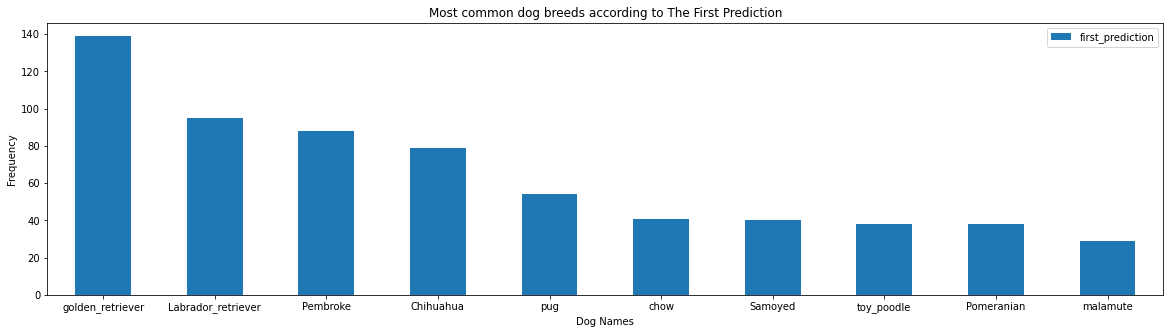

In [49]:
dog_rating_df['first_prediction'].value_counts()[:10].plot(kind = 'bar', figsize = (20,5), rot = 0);
plt.xlabel('Dog Names');
plt.ylabel('Frequency');
plt.title('Most common dog breeds according to The First Prediction')
plt.legend();

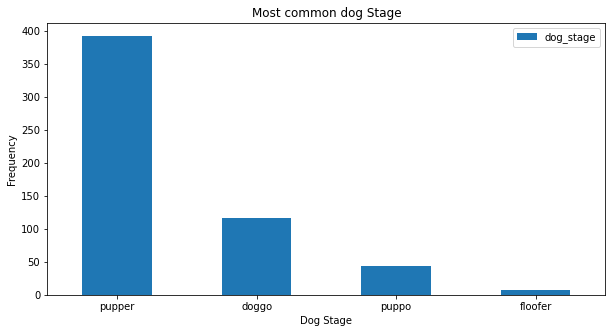

In [50]:
dog_rating_df['dog_stage'].value_counts().plot(kind = 'bar', figsize = (10,5), rot = 0);
plt.xlabel('Dog Stage');
plt.ylabel('Frequency');
plt.title('Most common dog Stage')
plt.legend();

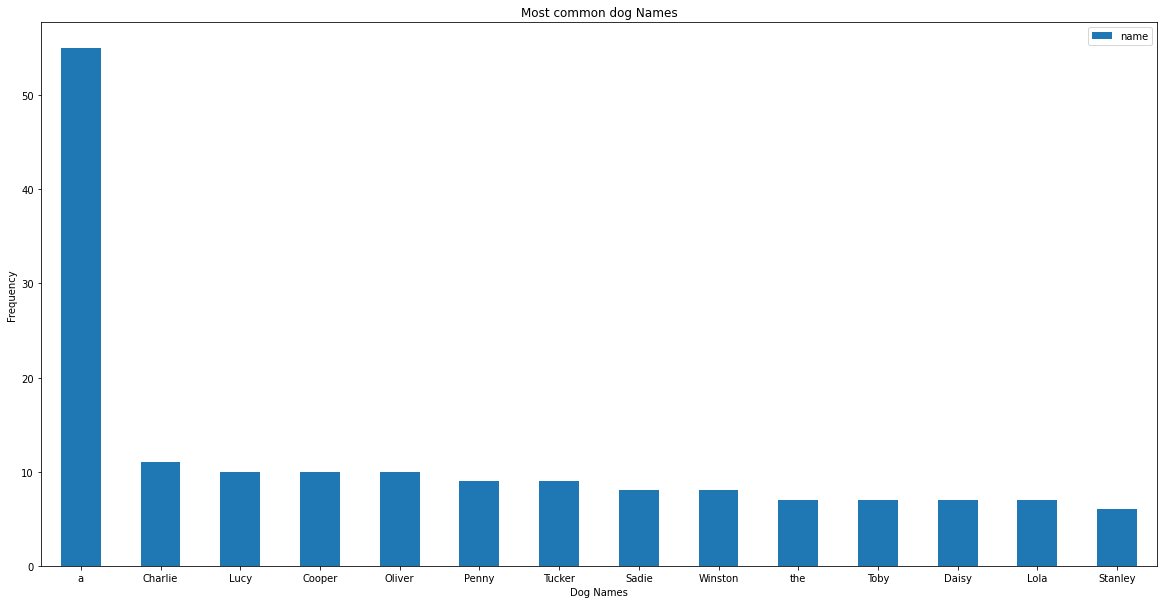

In [51]:
dog_rating_df['name'].value_counts()[1:15].plot(kind = 'bar', figsize =(20,10), rot = 0);
plt.xlabel('Dog Names');
plt.ylabel('Frequency');
plt.title('Most common dog Names')
plt.legend();